In [1]:
# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 분류

## 3.1. MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
X , y = mnist['data'],mnist['target']
y = y.astype(np.int)
X.shape
y.shape
X

(70000, 784)

(70000,)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(-0.5, 27.5, 27.5, -0.5)

C:\Users\sorkt\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


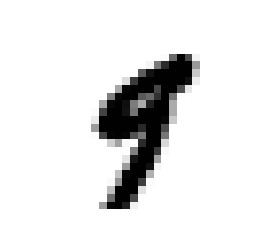

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = 'nearest')
plt.axis("off")
plt.show()

In [5]:
y[36000]

9

데이터 조사전 테스트셋 분리해야함, MNIST 데이터셋은 이미 훈련셋,테스트셋 분리되어있음

In [6]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

훈련셋을 섞어서 모든 교차검증 폴드가 비슷하게 만듦 (하나의 폴드라도 특정 숫자가 누락되면안됨)  
어떤 알고리듬은 훈련샘플의 순서에 민감하기 때문에 섞어줄 필요있음

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2. 이진 분류기 훈련  
문제를 단순화 해서 5만 식별하는 분류기 설계하기

분류를 위해 타깃 벡터 만들기

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SGD 분류기로 학습 (한번에 하나씩 독립적으로 처리하기 떄문에 온라인학습에 잘맞고, 큰 데이터셋을 처리하기 유리함)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 5, random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([False])

### 3.3. 성능 측정

### 3.3.1. 교차 검증을 사용한 정확도 측정

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3,scoring='accuracy')

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

array([0.9605 , 0.95595, 0.95375])

정확도가 매우 높아보이지만 어떤 결과를 넣든 5가 아님을 뱉는 더미 분류기를 만들어 비교하면

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)
    
never5clf = Never5Classifier()
cross_val_score(never5clf,X_train,y_train_5,cv = 3, scoring='accuracy')

array([0.909  , 0.90745, 0.9125 ])

데이터 대부분이 5가 아니므로 대충 5가 아니라고만 대답하면 정확도가 높게 나옴  
분류기를 평가할때 정확도를 성능 지표로 선호하지 않는 이유임 (불균형한 데이터셋을 다룰 때 특히 그럼)

### 3.3.2. 오차 행렬  
A의 샘플이 B로 분류된 횟수를 세는것  
예측값을 먼저 만들어야함

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)
#평가점수가 아닌 각 폴드에서 얻은 예측을 반환함

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52972,  1607],
       [  989,  4432]], dtype=int64)

행은 실제 클래스, 열은 예측한 클래스  
53533개의 False를 False로 예측
1046개의 False를 True로 잘못예측

In [15]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

조금 더 요약된 지표로 정밀도(precision)사용  
TP/(TP+FP)  
위 지표에는 다른 양성 샘플이 들어있지 않기때문에 재현율(recall,sensitivity,true positive rate)  
TP/(TP+FN)  

### 3.3.3. 정밀도와 재현율

In [16]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)
recall_score(y_train_5,y_train_pred)

0.7338963404537175

0.8175613355469471

확실히 정확도로만 볼때보다 안좋아 보임  
정밀도와 재현율을 F1 점수라고 하는 하나의 숫자로 만들면 편리함  
F1은 정밀도와 재현율의 조화평균  
F1 = 2/((1/정밀도)+(1/재현율)) = 2 * (정밀도 * 재현율)/(정밀도 + 재현율)

정밀도 , True로 예측했는데 이중 맞춘게 몇개인가?  
재현율 , 전체 True중에 몇개를 맞췄는가?

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7734729493891798

### 3.3.4. 정밀도/재현율 트레이드오프

사이킷런에서 예측에 사용한 점수를 확인할수 있음

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-176288.21703149])

In [19]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv =3,
                            method = 'decision_function') #예측 결과가 아닌 점수를 반환

C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\sorkt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [21]:
thresholds.shape

(59695,)

In [22]:
precisions.shape

(59696,)

In [23]:
recalls.shape

(59696,)

C:\Users\sorkt\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


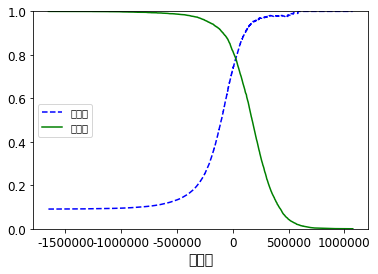

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='정밀도')
    plt.plot(thresholds,recalls[:-1],'g-',label='재현율')
    plt.xlabel('임계값')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

작업 특성에 따라 최선의 정밀도/재현율 트레이드오프를 만족하는 임계값을 선정해야함  
정밀도/재현율 플롯을 그리면 도움이 됨

Text(0.5, 0, 'recall')

Text(0, 0.5, 'precision')

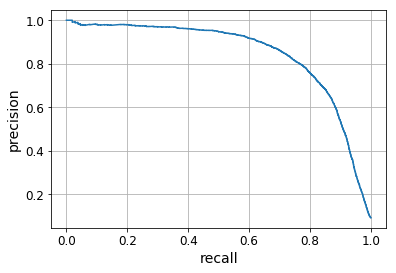

In [25]:
plt.plot(recalls,precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)

정밀도 90%를 달성하는것이 목표일경우

In [26]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5,y_train_pred_90)
recall_score(y_train_5,y_train_pred_90)

0.855198572066042

0.7070651171370596

### 3.3.5. ROC 곡선  
수신기 조작 특성 (receiver operation characteristic)  
정밀도/재현율 곡선과 비슷하지만 거짓양성 비율